<a href="https://colab.research.google.com/github/NewKanvas/Projeto-5/blob/main/analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Módulo 5 – Criptomoedas***

#### ***SOBRE O PROJETO***

`Esse é um projeto integrador, nós vamos utilizar
todas as ferramentas e conhecimentos trabalhados ao
longo do curso. `

**CONTEXTO**

Criptomoedas são moedas digitais descentralizadas baseadas em criptografia, que
operam em uma rede blockchain que permite transações seguras e transparentes
sem a necessidade de intermediários, como bancos. Elas fazem parte do mundo
digital, afetam a economia atual e são consideradas altamente voláteis.
Por isso, você e seu squad foram escalados por uma corretora financeira para
realizar uma análise exploratória relacionada à série histórica dos valores de
criptomoedas.

##### ***O QUE É PARA FAZER?***

Realizar uma análise exploratória histórica dos valores de
criptomoedas.
As fontes de dados que serão utilizadas no projeto estão
disponíveis no [Kaggle](https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrencypricehistory).



##### ***COMO FAZER?***

**DETALHES DO PROJETO**

A análise deverá responder às seguintes perguntas:
1. Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma
tendência de queda ou de aumento?
2. Quais os valores médios para todas as criptomoedas?
3. Em quais anos houve maiores quedas e valorizações?
4. Existe alguma tendência de aumento ou queda dos valores pelo dia da semana?
5. Qual moeda se mostra mais interessante em relação à valorização pela análise da série
histórica?
6. Qual moeda se mostra menos interessante em relação à valorização pela análise da série
histórica?
7. Existe correlação entre os valores para todas as criptomoedas?

### ***Importando as bibliotecas***

In [7]:

import pandas as pd # pip install pandas
import numpy as np # pip install numpy
import seaborn as sns # pip install seaborn
import matplotlib.pyplot as plt # pip install matplotlib
import plotly.graph_objs as go #pip install plotly nbformat Jinja2
import warnings

#Instalando tudo de uma vez:
#pip install pandas numpy seaborn matplotlib plotly nbformat Jinja2

# import plotly.express as px #  pip install --upgrade plotly

### **Tratando e Carregando Dados**

#### **Carregando Datasets**
> 23 Datasets disponibilizados pelo link do Kaggle

In [8]:
# Lendo os datasets
aave = pd.read_csv('https://raw.githubusercontent.com/NewKanvas/Projeto-5/main/Data/coin_Aave.csv')
binance_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_BinanceCoin.csv')
bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Bitcoin.csv')
cardano = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cardano.csv')
chainlink = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_ChainLink.csv')
cosmos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Cosmos.csv')
crypto_com_coin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_CryptocomCoin.csv')
dogecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Dogecoin.csv')
eos = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_EOS.csv')
ethereum = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Ethereum.csv')
iota = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Iota.csv')
litecoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Litecoin.csv')
monero = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Monero.csv')
nem = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_NEM.csv')
polkadot = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Polkadot.csv')
solana = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Solana.csv')
stellar = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Stellar.csv')
tether = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tether.csv')
tron = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Tron.csv')
uniswap = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_Uniswap.csv')
usdcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_USDCoin.csv')
wrapped_bitcoin = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_WrappedBitcoin.csv')
xrp = pd.read_csv('https://github.com/NewKanvas/Projeto-5/raw/main/Data/coin_XRP.csv')


#### ***Unindo todos os datasets em 1 dataframe.***

In [9]:
# Concatenando Datasets
cripto = pd.concat([aave, binance_coin, bitcoin, cardano, chainlink, cosmos, crypto_com_coin, dogecoin, eos, ethereum, iota, litecoin, monero, nem, polkadot, solana, stellar, tether, tron, uniswap, usdcoin, wrapped_bitcoin, xrp], ignore_index=True)


#### ***Limpeza dos Dados***

In [10]:
#Convertendo para conter somente a Data
cripto['Date'] = pd.to_datetime(cripto['Date']).dt.date 

In [11]:
# Removendo Colunas que não utilizaremos
del cripto['SNo']
del cripto['Symbol']

In [12]:
## Traduzindo Colunas
traducao = {"Name": "Moeda",
            "Date": "Data",
            "High": "Alta",
            "Low": "Baixa",
            "Open": "Abertura",
            "Close": "Fechamento",
            "Volume": "Volume",
            "Marketcap": "Marketcap",} # Gerando dicionario para tradução
cripto.rename(columns=traducao, inplace=True)# Renomeando

In [13]:
cripto

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.112358,49.787900,52.675035,53.219243,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.402270,40.734578,53.291969,42.401599,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.408314,35.970690,42.399947,40.083976,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.902511,36.696057,39.885262,43.764463,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.569533,43.291776,43.764463,46.817744,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.667287,0.634726,0.659890,0.656763,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.683677,0.644653,0.655639,0.672888,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.707783,0.665802,0.673218,0.694945,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.695653,0.648492,0.695653,0.654300,2.076373e+09,3.019395e+10


In [14]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

## Formantando valores

In [15]:
format = lambda x: '%.2f' % x # %x (aplica no x)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)
cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].astype(float) # Reformatando os valores para float

C:\Users\36131502023.1\AppData\Local\Temp\ipykernel_13172\4245637394.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']] = cripto[['Alta', 'Baixa', 'Abertura', 'Fechamento', 'Volume', 'Marketcap']].applymap(format)


In [16]:
cripto

,Moeda,Data,Alta,Baixa,Abertura,Fechamento,Volume,Marketcap
0,Aave,2020-10-05,55.11,49.79,52.68,53.22,0.000000e+00,8.912813e+07
1,Aave,2020-10-06,53.40,40.73,53.29,42.40,5.830915e+05,7.101144e+07
2,Aave,2020-10-07,42.41,35.97,42.40,40.08,6.828342e+05,6.713004e+07
3,Aave,2020-10-08,44.90,36.70,39.89,43.76,1.658817e+06,2.202651e+08
4,Aave,2020-10-09,47.57,43.29,43.76,46.82,8.155377e+05,2.356322e+08
...,...,...,...,...,...,...,...,...
37077,XRP,2021-07-02,0.67,0.63,0.66,0.66,2.061607e+09,3.030759e+10
37078,XRP,2021-07-03,0.68,0.64,0.66,0.67,1.872820e+09,3.105172e+10
37079,XRP,2021-07-04,0.71,0.67,0.67,0.69,1.885242e+09,3.206960e+10
37080,XRP,2021-07-05,0.70,0.65,0.70,0.65,2.076373e+09,3.019395e+10


In [17]:
cripto.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

### **Selecionando 10 criptomoedas:**

#### Agrupando os valores das moedas

In [18]:
# Criando copia Formatada do Dataframe Original
cripto_form = cripto.set_index(['Moeda', 'Data']).unstack(level=0) 
# Selecionando o valor de Fechamento
cripto_grp = cripto_form['Fechamento'] # Pode mudar para selecionar outro valor

cripto_grp

Moeda,Aave,Binance Coin,Bitcoin,Cardano,Chainlink,Cosmos,Crypto.com Coin,Dogecoin,EOS,Ethereum,...,NEM,Polkadot,Solana,Stellar,TRON,Tether,USD Coin,Uniswap,Wrapped Bitcoin,XRP
Data,,,,,,,,,,,,,,,,,,,,,
2013-04-29,NaN,NaN,144.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-30,NaN,NaN,139.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-01,NaN,NaN,116.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-02,NaN,NaN,105.21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-05-03,NaN,NaN,97.75,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-02,233.95,287.42,33897.05,1.39,18.28,11.76,0.11,0.25,3.93,2150.04,...,0.13,15.34,34.02,0.26,0.07,1.0,1.0,18.24,33824.26,0.66
2021-07-03,259.66,298.24,34668.55,1.41,18.54,11.82,0.12,0.25,4.05,2226.11,...,0.13,15.55,34.48,0.26,0.07,1.0,1.0,19.52,34676.99,0.67
2021-07-04,277.04,307.73,35287.78,1.46,19.26,12.26,0.12,0.25,4.06,2321.72,...,0.14,16.01,34.31,0.27,0.07,1.0,1.0,20.77,35289.76,0.69


#### Gerando as medias das Moedas Selecionadas

In [19]:
cripto_mean = cripto_grp.mean().sort_values(ascending=False) # Verificando as maiores medias de fechamento.

cripto_mean

Moeda
Wrapped Bitcoin    17086.573806
Bitcoin             6711.290425
Ethereum             383.910727
Aave                 255.525782
Monero                74.134712
Binance Coin          52.250319
Litecoin              49.279017
Polkadot              18.143031
Uniswap               17.077329
Solana                10.471615
Cosmos                 6.768154
Chainlink              6.308527
EOS                    4.624175
USD Coin               1.003383
Tether                 1.000475
IOTA                   0.729340
Cardano                0.256179
XRP                    0.235309
NEM                    0.124537
Stellar                0.100677
Crypto.com Coin        0.081743
TRON                   0.032414
Dogecoin               0.012659
dtype: float64

#### Filtrando as Moedas

In [20]:
cripto_mean = cripto_mean.drop('Wrapped Bitcoin') # Removendo a Wrapped Bitcoin
cripto_mean = cripto_mean.head(10) # Pegando as 10 maiores
cripto_mean

Moeda
Bitcoin         6711.290425
Ethereum         383.910727
Aave             255.525782
Monero            74.134712
Binance Coin      52.250319
Litecoin          49.279017
Polkadot          18.143031
Uniswap           17.077329
Solana            10.471615
Cosmos             6.768154
dtype: float64

In [21]:
cripto_top10 = cripto_mean.index.tolist() # Pegando os Indices e colocando em uma lista
cripto_top10

['Bitcoin',
 'Ethereum',
 'Aave',
 'Monero',
 'Binance Coin',
 'Litecoin',
 'Polkadot',
 'Uniswap',
 'Solana',
 'Cosmos']

#### Criando Novo Dataframe das Moedas selecionadas

In [28]:
criptocopy = cripto[cripto['Moeda'].isin(cripto_top10)].reset_index(drop=True) # Filtrando no DataFrame Original para pegar somente as moedas selecionadas
del criptocopy['Volume']
del criptocopy['Marketcap'] 
del criptocopy['Alta']
del criptocopy['Baixa'] 
criptocopy

,Moeda,Data,Abertura,Fechamento
0,Aave,2020-10-05,52.68,53.22
1,Aave,2020-10-06,53.29,42.40
2,Aave,2020-10-07,42.40,40.08
3,Aave,2020-10-08,39.89,43.76
4,Aave,2020-10-09,43.76,46.82
...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24
14366,Uniswap,2021-07-03,18.23,19.52
14367,Uniswap,2021-07-04,19.48,20.77
14368,Uniswap,2021-07-05,20.77,20.10


In [35]:
# Transformar a coluna "Data" em datetime
criptocopy['Data'] = pd.to_datetime(criptocopy['Data'])

# Adicionar a coluna "Variação [%]"
criptocopy['Variação [%]'] = (criptocopy['Fechamento'] - criptocopy['Abertura']) / criptocopy['Abertura'] * 100

# Adicionar a coluna "Dia da Semana"
criptocopy['Dia da Semana'] = criptocopy['Data'].dt.day_name()


In [36]:
# Dicionário com os dias da semana em inglês e suas traduções em português
dias_semana = {
    'Monday': 'Segunda-feira',
    'Tuesday': 'Terça-feira',
    'Wednesday': 'Quarta-feira',
    'Thursday': 'Quinta-feira',
    'Friday': 'Sexta-feira',
    'Saturday': 'Sábado',
    'Sunday': 'Domingo'
}

# Traduzir os dias da semana
criptocopy['Dia da Semana'] = criptocopy['Dia da Semana'].map(dias_semana)
criptocopy

,Moeda,Data,Abertura,Fechamento,Variação [%],Dia da Semana
0,Aave,2020-10-05,52.68,53.22,1.025057,Segunda-feira
1,Aave,2020-10-06,53.29,42.40,-20.435354,Terça-feira
2,Aave,2020-10-07,42.40,40.08,-5.471698,Quarta-feira
3,Aave,2020-10-08,39.89,43.76,9.701680,Quinta-feira
4,Aave,2020-10-09,43.76,46.82,6.992687,Sexta-feira
...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24,2.299495,Sexta-feira
14366,Uniswap,2021-07-03,18.23,19.52,7.076248,Sábado
14367,Uniswap,2021-07-04,19.48,20.77,6.622177,Domingo
14368,Uniswap,2021-07-05,20.77,20.10,-3.225806,Segunda-feira


In [37]:
criptocopy['Moeda'].unique() # Verificando as moedas selecionadas

array(['Aave', 'Binance Coin', 'Bitcoin', 'Cosmos', 'Ethereum',
       'Litecoin', 'Monero', 'Polkadot', 'Solana', 'Uniswap'],
      dtype=object)

In [24]:
criptocopy.dtypes

Moeda          object
Data           object
Alta          float64
Baixa         float64
Abertura      float64
Fechamento    float64
Volume        float64
Marketcap     float64
dtype: object

### **Criando CSVs**

In [25]:
criptocopy.to_csv('../Data/criptomoedas.csv', index=False) # Salvando tabela filtrada em csv
cripto.to_csv('../Data/cripto.csv', index=False) # Salvando tabela em csv

OSError: Cannot save file into a non-existent directory: '..\Data'

# **Questões**:

## **1- Como se comportaram os valores para todas as criptomoedas? Os valores tiveram uma tendência de queda ou de aumento?**

### Análise Gráfica utilizando média móvel

In [ ]:
tab_bitcoin = cripto.query('Moeda == "Bitcoin"')
tab_ethereum = cripto.query('Moeda == "Ethereum"')
tab_aave = cripto.query('Moeda == "Aave"')
tab_monero = cripto.query('Moeda == "Monero"')
tab_binance = cripto.query('Moeda == "Binance Coin"')
tab_litecoin = cripto.query('Moeda == "Litecoin"')
tab_polkadot = cripto.query('Moeda == "Polkadot"')
tab_uniswap = cripto.query('Moeda == "Uniswap"')
tab_solana = cripto.query('Moeda == "Solana"')
tab_cosmos = cripto.query('Moeda == "Cosmos"')

moedas = [tab_bitcoin,tab_ethereum,tab_aave,tab_monero,tab_binance,tab_litecoin,tab_polkadot,tab_uniswap,tab_solana,tab_cosmos ]

In [ ]:
periodo = 30

tab_bitcoin['media_movel'] = tab_bitcoin['Fechamento'].rolling(window=periodo).mean()
tab_ethereum['media_movel'] = tab_ethereum['Fechamento'].rolling(window=periodo).mean()
tab_aave['media_movel'] = tab_aave['Fechamento'].rolling(window=periodo).mean()
tab_monero['media_movel'] = tab_monero['Fechamento'].rolling(window=periodo).mean()
tab_binance['media_movel'] = tab_binance['Fechamento'].rolling(window=periodo).mean()
tab_litecoin['media_movel'] = tab_litecoin['Fechamento'].rolling(window=periodo).mean()
tab_polkadot['media_movel'] = tab_polkadot['Fechamento'].rolling(window=periodo).mean()
tab_uniswap['media_movel'] = tab_uniswap['Fechamento'].rolling(window=periodo).mean()
tab_solana['media_movel'] = tab_solana['Fechamento'].rolling(window=periodo).mean()
tab_cosmos['media_movel'] = tab_cosmos['Fechamento'].rolling(window=periodo).mean()

In [ ]:
import plotly.graph_objs as go

# Criando os traces (linhas) para cada criptomoeda
trace_bitcoin = go.Scatter(x=tab_bitcoin['Data'], y=tab_bitcoin['media_movel'], mode='lines', name='Bitcoin', line=dict(color='green', width=2))
trace_ethereum = go.Scatter(x=tab_ethereum['Data'], y=tab_ethereum['media_movel'], mode='lines', name='Ethereum', line=dict(color='purple', width=2))
trace_aave = go.Scatter(x=tab_aave['Data'], y=tab_aave['media_movel'], mode='lines', name='Aave', line=dict(color='pink', width=2))
trace_monero = go.Scatter(x=tab_monero['Data'], y=tab_monero['media_movel'], mode='lines', name='Monero', line=dict(color='blue', width=2))
trace_binance = go.Scatter(x=tab_binance['Data'], y=tab_binance['media_movel'], mode='lines', name='Binance Coin', line=dict(color='red', width=2))
trace_litecoin = go.Scatter(x=tab_litecoin['Data'], y=tab_litecoin['media_movel'], mode='lines', name='Litecoin', line=dict(color='orange', width=2))
trace_polkadot = go.Scatter(x=tab_polkadot['Data'], y=tab_polkadot['media_movel'], mode='lines', name='Polkadot', line=dict(color='cyan', width=2))
trace_uniswap = go.Scatter(x=tab_uniswap['Data'], y=tab_uniswap['media_movel'], mode='lines', name='Uniswap', line=dict(color='magenta', width=2))
trace_solana = go.Scatter(x=tab_solana['Data'], y=tab_solana['media_movel'], mode='lines', name='Solana', line=dict(color='yellow', width=2))
trace_cosmos = go.Scatter(x=tab_cosmos['Data'], y=tab_cosmos['media_movel'], mode='lines', name='Cosmos', line=dict(color='lime', width=2))

# Criando o layout
layout = go.Layout(
    title='Comportamento de Valores',
    xaxis=dict(title='Data'),
    yaxis=dict(title='Valor')
)

# Criando a figura
fig = go.Figure(data=[trace_bitcoin, trace_ethereum, trace_aave, trace_monero, trace_binance, trace_litecoin, trace_polkadot, trace_uniswap, trace_solana, trace_cosmos], layout=layout)

# Exibindo o gráfico
fig.show()

É importante lembrar que o mercado de criptomoedas é altamente volátil e influenciado por uma variedade de fatores, por isso optamos por suavizar a curva para podermos vizualizar melhor as tentendencias, momentos de pico e de vale. Podemos ver um movimento padrãos da Criptos com máximos de valorização na transição de 2017 para 2018, e primeiro semestre de 2021. 

Os movimentos de alta foram iniciados no primeiro semestre de 2017, quando houve um boom no mercado de criptomoedas impulsionado pelo aumento da adoção e pelo interesse crescente de investidores. O Bitcoin atingiu seu preço mais alto até então, impulsionado pelo entusiasmo em torno da tecnologia blockchain e pela expectativa de ganhos rápidos.  Outro ponto de inflexão foi no inicio de 2020, junto com a pandemia de Covid-19 desempenhou um papel importante nesse movimento. A crise global e as medidas de estímulo adotadas por governos e bancos centrais aumentaram a busca por ativos alternativos, incluindo criptomoedas. Muitos investidores viram as criptomoedas como uma reserva de valor e uma proteção contra a inflação.

 Nos ultimos 3 meses podemos observar uma tendencia de desvalorização.

### Analise Temporal

In [ ]:
# Criando um DataFrame vazio
df = pd.DataFrame(columns=['Moeda', 'Valor Inicial','2020', '12 meses', '6 meses','3 meses', 'Ultimo Mês', 'Último Dado'])


# Adicionando os valores de fechamento para cada moeda
for i, tab_moeda in enumerate(moedas):
    df.loc[i, 'Moeda'] = tab_moeda['Moeda'].iloc[0]  # Primeiro Valor
    df.loc[i, 'Valor Inicial'] = tab_moeda['Fechamento'].iloc[0]  # Primeiro Valor
    try:
      df.loc[i, '2020'] = tab_moeda['Fechamento'].iloc[-552]
    except:
      df.loc[i, '2020'] = None
    try:
      df.loc[i, '12 meses'] = tab_moeda['Fechamento'].iloc[-365]
    except:
      df.loc[i, '12 meses'] = None
    df.loc[i, '6 meses'] = tab_moeda['Fechamento'].iloc[-180]
    df.loc[i, '3 meses'] = tab_moeda['Fechamento'].iloc[-90]
    df.loc[i, 'Ultimo Mês'] = tab_moeda['Fechamento'].iloc[-30]
    df.loc[i, 'Último Dado'] = tab_moeda['Fechamento'].iloc[-1]


#display(df)

In [ ]:
novo_df = pd.DataFrame({
    'Moeda': df['Moeda'],
    'Todo Periodo': (df['Último Dado']/ df['Valor Inicial'] -1)*100,
    '2020': (df['Último Dado']/df['2020'] -1)*100,
    '12 meses': (df['Último Dado']/df['12 meses'] -1)*100,
    '6 meses': (df['Último Dado']/df['6 meses'] -1)*100,
    '3 meses': (df['Último Dado']/df['3 meses'] -1)*100,
    'Ultimo Mês': (df['Último Dado']/df['Ultimo Mês'] -1)*100,
})


# Função para aplicar a formatação condicional
def color_negative_red(value):
    if pd.isna(value):
        return 'color: black; font-weight: bold'
    color = 'red' if value < 0 else 'green'
    return 'color: %s; font-weight: bold' % color



# Ordenando o DataFrame novo_df pelo último mês
novo_df_sorted = novo_df.sort_values(by='Todo Periodo', ascending=False)

# Aplicando a formatação condicional ao DataFrame ordenado e imprimindo
styled_df_sorted = novo_df_sorted.style.map(color_negative_red, subset=['Todo Periodo','2020', '12 meses', '6 meses', '3 meses', 'Ultimo Mês'])

# Arredondando os valores no objeto styled_df_sorted
styled_df_arredondado = styled_df_sorted.format(precision=2)

# Exibindo o DataFrame arredondado
styled_df_arredondado

,Moeda,Todo Periodo,2020,12 meses,6 meses,3 meses,Ultimo Mês
1,Ethereum,309857.33,1724.57,872.34,89.89,11.30,-10.25
4,Binance Coin,291654.55,2363.01,1813.71,656.91,-23.23,-10.18
0,Bitcoin,23585.62,390.09,270.02,-16.09,-41.30,2.01
3,Monero,10478.10,385.55,244.24,55.85,-17.73,-10.76
8,Solana,4293.59,nan,4469.33,964.29,26.79,-10.43
5,Litecoin,3073.29,249.05,220.84,-19.79,-38.77,-14.06
2,Aave,495.45,nan,nan,183.71,-16.15,-5.09
6,Polkadot,460.42,nan,nan,73.36,-60.99,-25.38
7,Uniswap,224.64,nan,nan,280.31,-25.88,-7.44
9,Cosmos,75.47,221.76,306.17,121.18,-35.87,-1.86


Ao analisar a tabela, é possível observar que a maioria das criptomoedas apresentou valorização em sua série histórica. O Bitcoin, embora tenha o maior valor absoluto, não registrou a maior valorização relativa, ocupando o terceiro lugar nesse aspecto.

Foi realizado um recorte de dados a partir de 1º de janeiro de 2020 para analisar o impacto da pandemia de Covid-19 nas criptomoedas. Nesse período, a maioria das criptomoedas valorizou-se até a data de encerramento da análise. Tanto no último ano quanto nos últimos seis meses, a tendência predominante foi de aumento, com poucas exceções.

No entanto, nos últimos três meses e no último mês, houve uma tendência geral de desvalorização das moedas, com algumas exceções. Esse fenômeno pode ser atribuído à retomada gradual das atividades econômicas ao longo de 2021, impulsionada pelos avanços científicos na vacinação contra a Covid-19. Isso levou a uma revisão da percepção de risco e resultou em uma diminuição do interesse por investimentos em criptomoedas.

É importante destacar que essas observações são baseadas em análises históricas e em tendências passadas, e não garantem resultados futuros. O mercado de criptomoedas é altamente volátil e influenciado por uma ampla gama de fatores, como eventos econômicos, regulatórios e tecnológicos.

## **2- Quais os valores médios para todas as criptomoedas?**


In [ ]:
columns = ["Alta", "Baixa", "Abertura", "Fechamento", "Volume"]

data = []
for moeda in cripto_top10:
    tab_moeda = cripto.query(f'Moeda == "{moeda}"')
    media = tab_moeda[columns].mean().round(2)  # Formatação com 2 casas decimais
    data.append([moeda, media["Alta"], media["Baixa"], media["Abertura"], media["Fechamento"], media["Volume"]])

average_dataframe = pd.DataFrame(data, columns=["Moeda", "Alta", "Baixa", "Abertura", "Fechamento", "Volume"])

In [ ]:
average_dataframe

,Moeda,Alta,Baixa,Abertura,Fechamento,Volume
0,Bitcoin,6893.33,6486.01,6700.15,6711.29,1.090633e+10
1,Ethereum,398.26,365.59,382.88,383.91,7.057058e+09
2,Aave,271.31,237.74,254.51,255.53,5.023421e+08
3,Monero,77.36,70.48,74.07,74.13,1.637467e+08
4,Binance Coin,54.76,49.17,52.03,52.25,6.269804e+08
5,Litecoin,51.34,46.93,49.25,49.28,1.284851e+09
6,Polkadot,19.13,16.96,18.11,18.14,2.006507e+09
7,Uniswap,18.09,15.93,17.01,17.08,1.061551e+09
8,Solana,11.19,9.65,10.40,10.47,1.956751e+08
9,Cosmos,7.14,6.37,6.76,6.77,2.963413e+08


## ****3. Em quais anos houve maiores quedas e valorizações?**


In [ ]:
# Obter anos únicos
criptocopy['Data'] = pd.to_datetime(criptocopy['Data'])
anos = criptocopy['Data'].dt.year.unique()

# Inicializar uma lista para armazenar os dados
dados = []

# Loop para cada moeda
for moeda in cripto_top10:
    # Loop para cada ano
    for ano in anos:
        # Filtrar os dados para a moeda e ano específicos
        dados_moeda_ano = criptocopy[(criptocopy['Moeda'] == moeda) & (criptocopy['Data'].dt.year == ano)]
        
        # Verificar se existem dados para a moeda e ano específicos
        if len(dados_moeda_ano) > 0:
            # Obter o índice do valor máximo de Fechamento com base na maior data do ano
            indice_max = dados_moeda_ano[dados_moeda_ano['Data'] == dados_moeda_ano['Data'].max()]['Fechamento'].idxmax()
            
            # Obter o índice do valor mínimo de Abertura com base na menor data do ano
            indice_min = dados_moeda_ano[dados_moeda_ano['Data'] == dados_moeda_ano['Data'].min()]['Abertura'].idxmin()
            
            # Obter os valores de Fechamento e Abertura correspondentes
            valor_max = dados_moeda_ano.loc[indice_max, 'Fechamento']
            valor_min = dados_moeda_ano.loc[indice_min, 'Abertura']
            
            # Calcular a variação percentual
            variacao = (valor_max - valor_min) / valor_min * 100
            variacao = round(variacao,2)
            
            # Adicionar os dados à lista
            dados.append([moeda, ano, valor_max, valor_min, variacao])

# Criar o dataframe
df_year = pd.DataFrame(dados, columns=['Moeda', 'Ano', 'Max', 'Min', 'Variacao_Percentual'])

# Exibir o dataframe
print(df_year)

           Moeda   Ano       Max       Min  Variacao_Percentual
0        Bitcoin  2020  29001.72   7194.89               303.09
1        Bitcoin  2021  34235.19  28994.01                18.08
2        Bitcoin  2017  14156.40    963.66              1369.02
3        Bitcoin  2018   3742.70  14112.20               -73.48
4        Bitcoin  2019   7193.60   3746.71                92.00
5        Bitcoin  2013    754.01    134.44               460.85
6        Bitcoin  2014    320.19    754.97               -57.59
7        Bitcoin  2015    430.57    320.43                34.37
8        Bitcoin  2016    963.74    430.72               123.75
9       Ethereum  2020    737.80    129.63               469.16
10      Ethereum  2021   2324.68    737.71               215.12
11      Ethereum  2017    756.73      7.98              9382.83
12      Ethereum  2018    133.37    755.76               -82.35
13      Ethereum  2019    129.61    133.42                -2.86
14      Ethereum  2015      0.93      2.

In [ ]:
tab_year_bitcoin = df_year[df_year['Moeda'] == "Bitcoin"].sort_values('Ano').reset_index(drop=True)
tab_year_ethereum = df_year[df_year['Moeda'] == "Ethereum"].sort_values('Ano').reset_index(drop=True)
tab_year_aave = df_year[df_year['Moeda'] == "Aave"].sort_values('Ano').reset_index(drop=True)
tab_year_monero = df_year[df_year['Moeda'] == "Monero"].sort_values('Ano').reset_index(drop=True)
tab_year_binance = df_year[df_year['Moeda'] == "Binance Coin"].sort_values('Ano').reset_index(drop=True)
tab_year_litecoin = df_year[df_year['Moeda'] == "Litecoin"].sort_values('Ano').reset_index(drop=True)
tab_year_polkadot = df_year[df_year['Moeda'] == "Polkadot"].sort_values('Ano').reset_index(drop=True)
tab_year_uniswap = df_year[df_year['Moeda'] == "Uniswap"].sort_values('Ano').reset_index(drop=True)
tab_year_solana = df_year[df_year['Moeda'] == "Solana"].sort_values('Ano').reset_index(drop=True)
tab_year_cosmos = df_year[df_year['Moeda'] == "Cosmos"].sort_values('Ano').reset_index(drop=True)

In [ ]:
tab_year_ethereum

,Moeda,Ano,Max,Min,Variacao_Percentual
0,Ethereum,2015,0.93,2.79,-66.67
1,Ethereum,2016,7.97,0.93,756.99
2,Ethereum,2017,756.73,7.98,9382.83
3,Ethereum,2018,133.37,755.76,-82.35
4,Ethereum,2019,129.61,133.42,-2.86
5,Ethereum,2020,737.80,129.63,469.16
6,Ethereum,2021,2324.68,737.71,215.12


In [ ]:
# Criando os traces (linhas) para cada criptomoeda
trace3_bitcoin = go.Scatter(x=tab_year_bitcoin['Ano'], y=tab_year_bitcoin['Variacao_Percentual'], mode='lines', name='Bitcoin', line=dict(color='green', width=2))
trace3_ethereum = go.Scatter(x=tab_year_ethereum['Ano'], y=tab_year_ethereum['Variacao_Percentual'], mode='lines', name='Ethereum', line=dict(color='purple', width=2))
trace3_aave = go.Scatter(x=tab_year_aave['Ano'], y=tab_year_aave['Variacao_Percentual'], mode='lines', name='Aave', line=dict(color='pink', width=2))
trace3_monero = go.Scatter(x=tab_year_monero['Ano'], y=tab_year_monero['Variacao_Percentual'], mode='lines', name='Monero', line=dict(color='blue', width=2))
trace3_binance = go.Scatter(x=tab_year_binance['Ano'], y=tab_year_binance['Variacao_Percentual'], mode='lines', name='Binance Coin', line=dict(color='red', width=2))
trace3_litecoin = go.Scatter(x=tab_year_litecoin['Ano'], y=tab_year_litecoin['Variacao_Percentual'], mode='lines', name='Litecoin', line=dict(color='orange', width=2))
trace3_polkadot = go.Scatter(x=tab_year_polkadot['Ano'], y=tab_year_polkadot['Variacao_Percentual'], mode='lines', name='Polkadot', line=dict(color='cyan', width=2))
trace3_uniswap = go.Scatter(x=tab_year_uniswap['Ano'], y=tab_year_uniswap['Variacao_Percentual'], mode='lines', name='Uniswap', line=dict(color='magenta', width=2))
trace3_solana = go.Scatter(x=tab_year_solana['Ano'], y=tab_year_solana['Variacao_Percentual'], mode='lines', name='Solana', line=dict(color='yellow', width=2))
trace3_cosmos = go.Scatter(x=tab_year_cosmos['Ano'], y=tab_year_cosmos['Variacao_Percentual'], mode='lines', name='Cosmos', line=dict(color='lime', width=2))

# Criando o layout
layout = go.Layout(
    title='Comportamento de Valores',
    xaxis=dict(title='Ano'),
    yaxis=dict(title='Variacao_Percentual')
)

# Criando a figura
fig = go.Figure(data=[trace3_bitcoin, trace3_ethereum, trace3_aave, trace3_monero, trace3_binance, trace3_litecoin, trace3_polkadot, trace3_uniswap, trace3_solana, trace3_cosmos], layout=layout)

# Exibindo o gráfico
fig.show()

In [ ]:
df_sorted = df_year[df_year['Ano'] == 2017].sort_values('Variacao_Percentual', ascending=False)
display(df_sorted)

,Moeda,Ano,Max,Min,Variacao_Percentual
11,Ethereum,2017,756.73,7.98,9382.832080
28,Binance Coin,2017,8.64,0.11,7754.545455
33,Litecoin,2017,232.10,4.33,5260.277136
20,Monero,2017,349.03,13.79,2431.036983
2,Bitcoin,2017,14156.40,963.66,1369.024345


In [ ]:
df_sorted = df_year[df_year['Ano'] == 2018].sort_values('Variacao_Percentual', ascending=True)
display(df_sorted)

,Moeda,Ano,Max,Min,Variacao_Percentual
34,Litecoin,2018,30.47,231.67,-86.847671
21,Monero,2018,46.23,349.55,-86.774424
12,Ethereum,2018,133.37,755.76,-82.352863
3,Bitcoin,2018,3742.70,14112.20,-73.478976
29,Binance Coin,2018,6.16,8.63,-28.621089


No ano de 2017, foi registrado um notável aumento na valorização relativa das criptomoedas em relação ao ano anterior. O Ethereum, em particular, obteve um crescimento de aproximadamente 9400%, demonstrando uma performance exponencialmente positiva. A Bitcoin apresentou o crescimento mais "modesto", atingindo cerca de 1400%.

O ano de 2018 foi marcado por uma reversão de tendência, com a maioria das criptomoedas experimentando desvalorização. Esse declínio pode ser atribuído, em grande parte, à correção de mercado após o período de alta intensidade observado em 2017. A especulação excessiva e a euforia resultaram em uma reavaliação dos ativos, levando a valores negativos em geral.

Essa correção pode ser interpretada como uma resposta saudável para estabilizar o mercado e mitigar a exuberância irracional. O ano de 2018 foi desafiador para o setor das criptomoedas, com uma queda significativa nos preços e uma reavaliação do risco associado a esses ativos.

Espero ter fornecido as informações solicitadas de forma técnica e precisa. Se houver alguma outra dúvida ou necessidade de esclarecimento adicional, fico à disposição para ajudar.

## 4 - 

In [38]:
criptocopy

,Moeda,Data,Abertura,Fechamento,Variação [%],Dia da Semana
0,Aave,2020-10-05,52.68,53.22,1.025057,Segunda-feira
1,Aave,2020-10-06,53.29,42.40,-20.435354,Terça-feira
2,Aave,2020-10-07,42.40,40.08,-5.471698,Quarta-feira
3,Aave,2020-10-08,39.89,43.76,9.701680,Quinta-feira
4,Aave,2020-10-09,43.76,46.82,6.992687,Sexta-feira
...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24,2.299495,Sexta-feira
14366,Uniswap,2021-07-03,18.23,19.52,7.076248,Sábado
14367,Uniswap,2021-07-04,19.48,20.77,6.622177,Domingo
14368,Uniswap,2021-07-05,20.77,20.10,-3.225806,Segunda-feira


In [39]:
cripto_top10

['Bitcoin',
 'Ethereum',
 'Aave',
 'Monero',
 'Binance Coin',
 'Litecoin',
 'Polkadot',
 'Uniswap',
 'Solana',
 'Cosmos']

In [86]:
# Definir o período desejado

data_inicio = '2020-07-06'
data_fim = '2021-07-06'

# Filtrar o DataFrame com base no período desejado
criptocopy_periodo = criptocopy[(criptocopy['Data'] >= data_inicio) & (criptocopy['Data'] <= data_fim)]
criptocopy_periodo

,Moeda,Data,Abertura,Fechamento,Variação [%],Dia da Semana
0,Aave,2020-10-05,52.68,53.22,1.025057,Segunda-feira
1,Aave,2020-10-06,53.29,42.40,-20.435354,Terça-feira
2,Aave,2020-10-07,42.40,40.08,-5.471698,Quarta-feira
3,Aave,2020-10-08,39.89,43.76,9.701680,Quinta-feira
4,Aave,2020-10-09,43.76,46.82,6.992687,Sexta-feira
...,...,...,...,...,...,...
14365,Uniswap,2021-07-02,17.83,18.24,2.299495,Sexta-feira
14366,Uniswap,2021-07-03,18.23,19.52,7.076248,Sábado
14367,Uniswap,2021-07-04,19.48,20.77,6.622177,Domingo
14368,Uniswap,2021-07-05,20.77,20.10,-3.225806,Segunda-feira


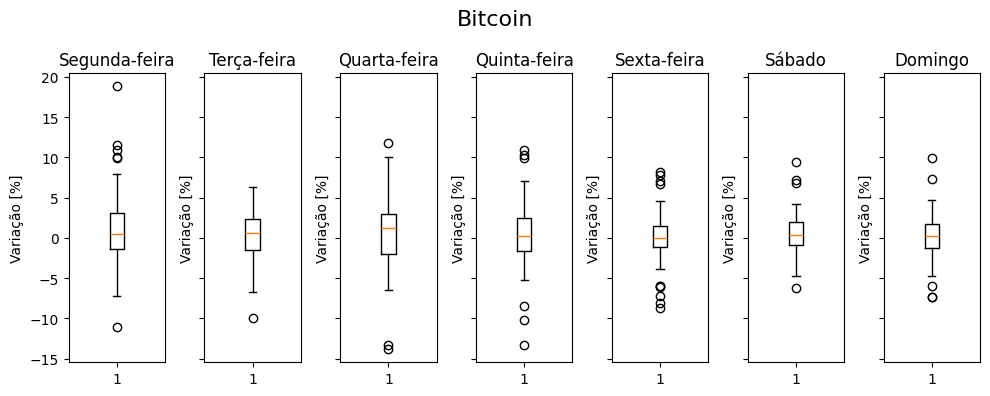

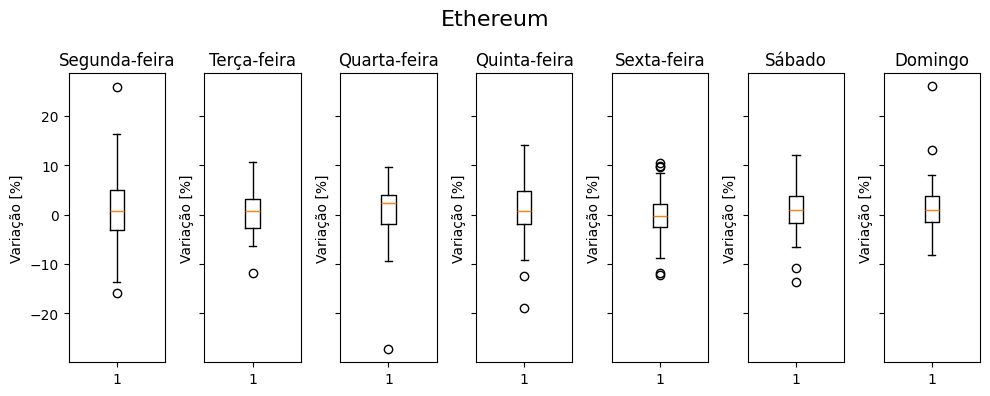

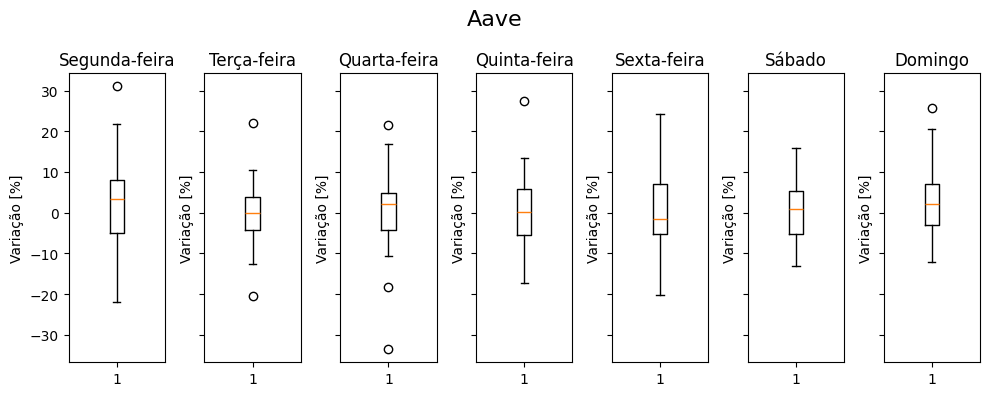

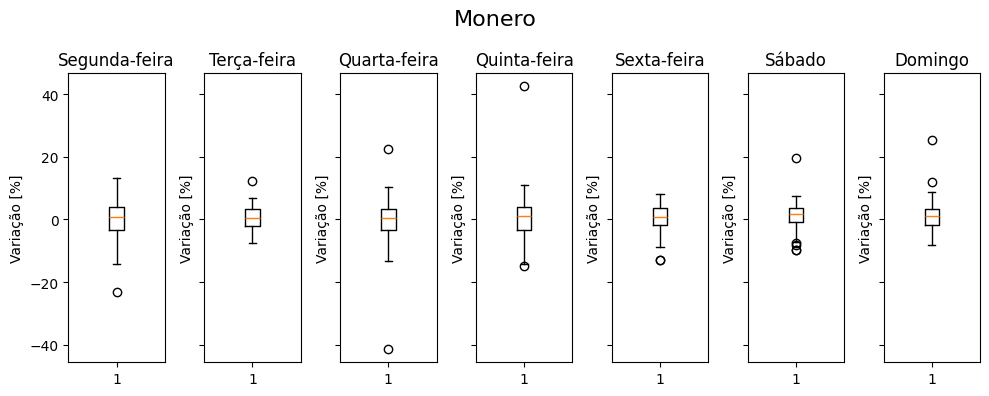

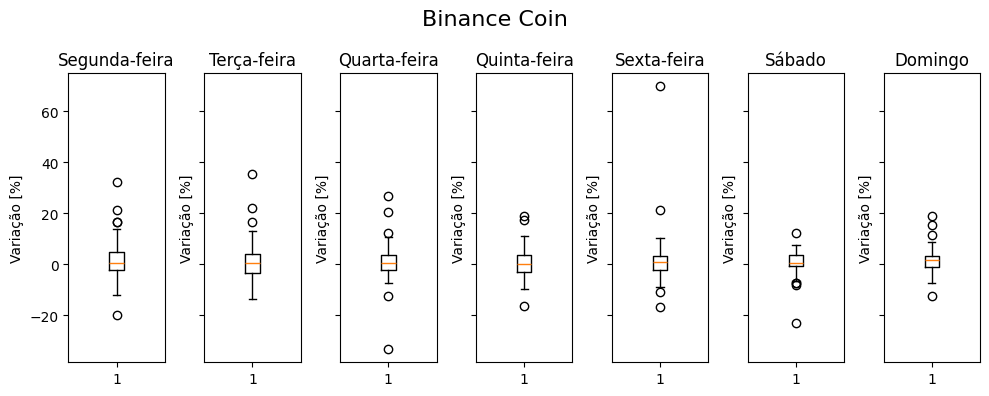

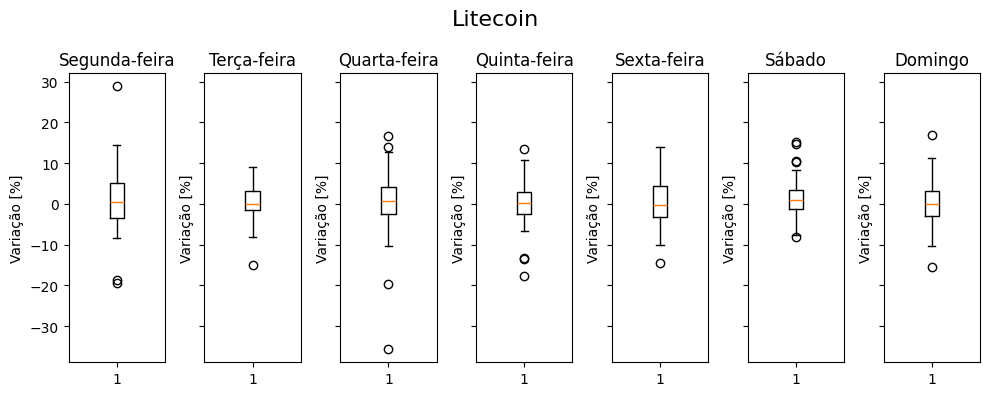

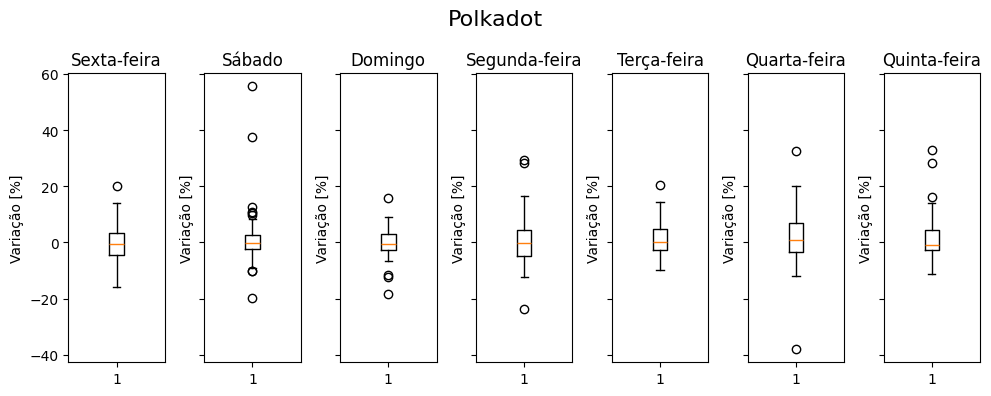

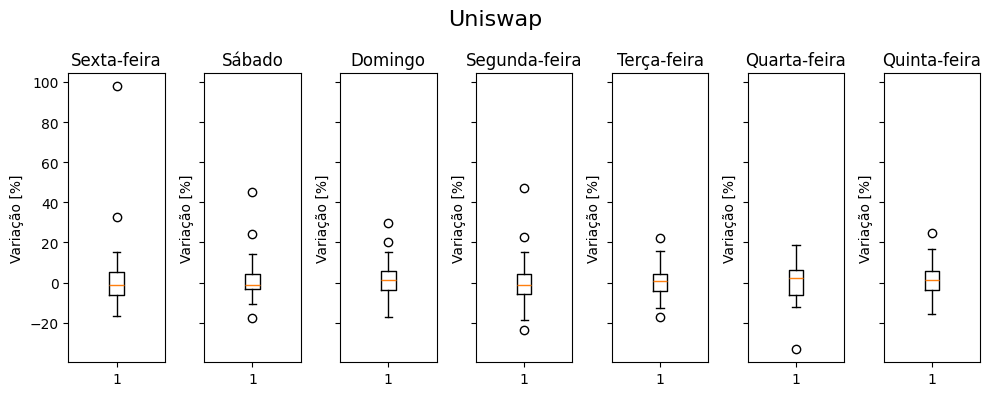

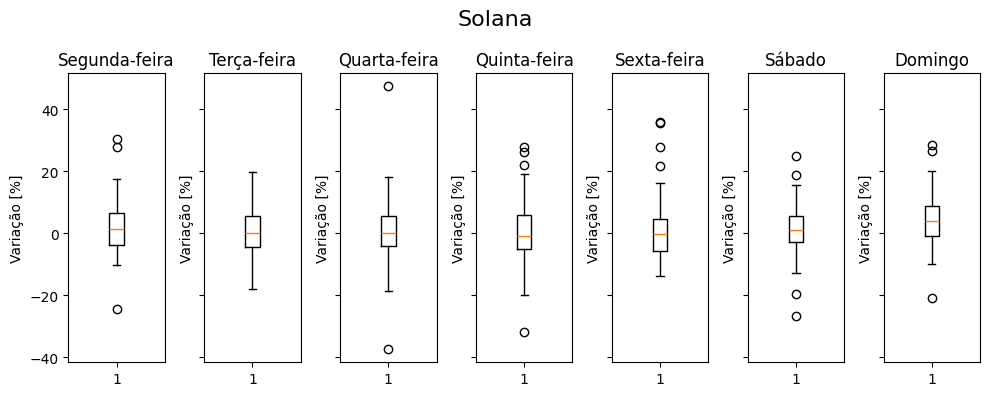

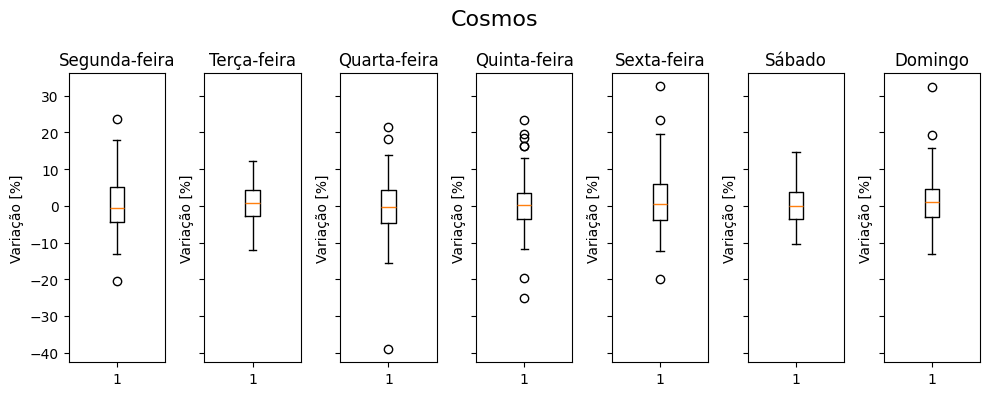

In [94]:
for moeda4 in cripto_top10:
    # Filtrar o DataFrame apenas para a moeda Ethereum
    moeda4_data = criptocopy_periodo[criptocopy_periodo['Moeda'] == moeda4]

# Criar uma figura com 7 subplots, um para cada dia da semana
    fig, axs = plt.subplots(1, 7, figsize=(10, 4), sharey=True)

# Iterar pelos dias da semana e criar um boxplot para cada dia
    for i, dia_semana in enumerate(moeda4_data['Dia da Semana'].unique()):
        # Filtrar os dados apenas para o dia da semana atual
        data_dia_semana = moeda4_data[moeda4_data['Dia da Semana'] == dia_semana]
        
        # Criar o boxplot para o dia da semana atual
        axs[i].boxplot(data_dia_semana['Variação [%]'])
        axs[i].set_title(dia_semana)
        axs[i].set_ylabel('Variação [%]')
        
# Adicionar título com o nome da moeda acima dos subplots
    fig.suptitle(moeda4, fontsize=16)    

# Ajustar o espaçamento entre os subplots
    plt.tight_layout()

# Exibir os boxplots
    plt.show()

In [76]:
# Calcular a média da Variação [%] para cada moeda no período desejado
media_variacao = criptocopy_periodo.groupby('Moeda')['Variação [%]'].mean()

# Filtrar apenas as moedas presentes na lista cripto_top10
media_variacao = media_variacao[media_variacao.index.isin(cripto_top10)]

# Exibir as médias de Variação [%] para cada moeda
media_variacao

Moeda
Aave            1.049271
Binance Coin    0.788370
Bitcoin         0.266903
Cosmos          0.352511
Ethereum        0.512368
Litecoin        0.300971
Monero          0.406495
Polkadot        0.856009
Solana          1.238600
Uniswap         1.128094
Name: Variação [%], dtype: float64

In [77]:
media_variacao_dia_semana = criptocopy_periodo.groupby('Dia da Semana')['Variação [%]'].mean()

# Exibir as médias de Variação [%] para cada dia da semana
print(media_variacao_dia_semana)

Dia da Semana
Domingo          0.441454
Quarta-feira     0.241956
Quinta-feira     0.251965
Segunda-feira    0.626403
Sexta-feira      0.633350
Sábado           0.685980
Terça-feira      0.405399
Name: Variação [%], dtype: float64


In [79]:
cripto_top10 = ['Bitcoin', 'Ethereum', 'Aave', 'Monero', 'Binance Coin', 'Litecoin', 'Polkadot', 'Uniswap', 'Solana', 'Cosmos']

# Filtrar o DataFrame apenas para as moedas presentes na lista cripto_top10
criptocopy_filtrado = criptocopy_periodo[criptocopy_periodo['Moeda'].isin(cripto_top10)]


# Calcular a média de Variação [%] de cada moeda para cada dia da semana
media_variacao_dia_semana = criptocopy_filtrado.pivot_table(index='Moeda', columns='Dia da Semana', values='Variação [%]', aggfunc='mean')

# Exibir o resultado
media_variacao_dia_semana

Dia da Semana,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira
Moeda,,,,,,,
Aave,2.317563,0.699311,0.345207,2.693433,0.542580,1.115107,-0.373966
Binance Coin,0.376742,0.530030,0.412182,1.084345,1.644001,0.818541,0.652748
Bitcoin,0.078604,0.100083,0.145759,0.731720,0.194133,0.321594,0.295272
Cosmos,0.615782,-0.253808,0.147293,0.431436,1.598018,0.528250,-0.606097
Ethereum,0.527264,0.561679,0.544360,0.412845,0.379038,0.414946,0.746276
Litecoin,0.128030,0.070432,0.018228,0.358695,0.323256,0.608669,0.598653
Monero,0.403160,0.054117,-0.014861,0.341320,0.580094,1.214867,0.264691
Polkadot,-0.220673,1.203305,1.614561,0.849075,-0.094419,1.835175,0.829078
Solana,2.888308,0.955216,0.299038,1.976611,1.643159,0.544743,0.350531


In [95]:

# Calcular a média de Variação [%] de cada moeda para cada dia da semana
media_variacao_dia_semana = criptocopy_filtrado.pivot_table(index='Moeda', columns='Dia da Semana', values='Variação [%]', aggfunc='mean')

# Calcular a média de cada moeda
media_moeda = criptocopy_filtrado.groupby('Moeda')['Variação [%]'].mean()

# Subtrair a média de cada moeda da tabela de média de variação por dia da semana
media_variacao_dia_semana = media_variacao_dia_semana.subtract(media_moeda, axis=0)

# Definir a função de formatação para as células
def color_negative_red(val):
    color = 'red' if val < 0 else 'green'
    return f'color: {color}'

# Aplicar a formatação às células
media_variacao_dia_semana = media_variacao_dia_semana.style.applymap(color_negative_red)

# Exibir a tabela formatada
media_variacao_dia_semana

C:\Users\36131502023.1\AppData\Local\Temp\ipykernel_13172\3784931201.py:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  media_variacao_dia_semana = media_variacao_dia_semana.style.applymap(color_negative_red)


Dia da Semana,Domingo,Quarta-feira,Quinta-feira,Segunda-feira,Sexta-feira,Sábado,Terça-feira
Moeda,,,,,,,
Aave,1.268292,-0.349960,-0.704064,1.644161,-0.506692,0.065835,-1.423237
Binance Coin,-0.411628,-0.258340,-0.376188,0.295975,0.855631,0.030171,-0.135622
Bitcoin,-0.188298,-0.166820,-0.121144,0.464817,-0.072769,0.054691,0.028369
Cosmos,0.263270,-0.606320,-0.205218,0.078924,1.245506,0.175739,-0.958609
Ethereum,0.014896,0.049311,0.031992,-0.099523,-0.133330,-0.097422,0.233908
Litecoin,-0.172941,-0.230539,-0.282743,0.057724,0.022285,0.307699,0.297682
Monero,-0.003336,-0.352378,-0.421357,-0.065176,0.173599,0.808372,-0.141804
Polkadot,-1.076682,0.347296,0.758553,-0.006934,-0.950428,0.979166,-0.026931
Solana,1.649709,-0.283383,-0.939561,0.738011,0.404559,-0.693857,-0.888068


## **7- Analisando Correlação**

In [58]:
criptoanlys =criptocopy.groupby(['Moeda', 'Data'])['Fechamento'].sum().unstack().fillna(0)
criptoanlys.T

Moeda,Aave,Binance Coin,Bitcoin,Cosmos,Ethereum,Litecoin,Monero,Polkadot,Solana,Uniswap
Data,,,,,,,,,,
2013-04-29,0.00,0.00,144.54,0.00,0.00,4.38,0.00,0.00,0.00,0.00
2013-04-30,0.00,0.00,139.00,0.00,0.00,4.30,0.00,0.00,0.00,0.00
2013-05-01,0.00,0.00,116.99,0.00,0.00,3.80,0.00,0.00,0.00,0.00
2013-05-02,0.00,0.00,105.21,0.00,0.00,3.37,0.00,0.00,0.00,0.00
2013-05-03,0.00,0.00,97.75,0.00,0.00,3.04,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...
2021-07-02,233.95,287.42,33897.05,11.76,2150.04,136.94,211.35,15.34,34.02,18.24
2021-07-03,259.66,298.24,34668.55,11.82,2226.11,140.28,214.75,15.55,34.48,19.52
2021-07-04,277.04,307.73,35287.78,12.26,2321.72,144.91,219.84,16.01,34.31,20.77


In [ ]:
criptoanlys.T.corr()

Moeda,Aave,Binance Coin,Bitcoin,Cosmos,Ethereum,Litecoin,Monero,Polkadot,Solana,Uniswap
Moeda,,,,,,,,,,
Aave,1.000000,0.888885,0.904269,0.904984,0.888439,0.630658,0.570616,0.969241,0.856316,0.972321
Binance Coin,0.888885,1.000000,0.846923,0.884532,0.896659,0.652883,0.618969,0.909625,0.960360,0.948143
Bitcoin,0.904269,0.846923,1.000000,0.930998,0.914318,0.812679,0.761104,0.921036,0.772803,0.902064
Cosmos,0.904984,0.884532,0.930998,1.000000,0.842983,0.674179,0.591878,0.928832,0.806987,0.913786
Ethereum,0.888439,0.896659,0.914318,0.842983,1.000000,0.847565,0.834097,0.870218,0.880085,0.893770
Litecoin,0.630658,0.652883,0.812679,0.674179,0.847565,1.000000,0.960068,0.634801,0.573416,0.634006
Monero,0.570616,0.618969,0.761104,0.591878,0.834097,0.960068,1.000000,0.576550,0.564720,0.585918
Polkadot,0.969241,0.909625,0.921036,0.928832,0.870218,0.634801,0.576550,1.000000,0.845631,0.980063
Solana,0.856316,0.960360,0.772803,0.806987,0.880085,0.573416,0.564720,0.845631,1.000000,0.902739


## Montando grafico de correlação

In [ ]:
# Importando bibliotecas
import matplotlib.pyplot as plt # pip install matplotlib
import seaborn as sns # pip install seaborn

Text(0.5, 1.0, 'Correlação entre os valores das moedas pelo valro de Fechamento')

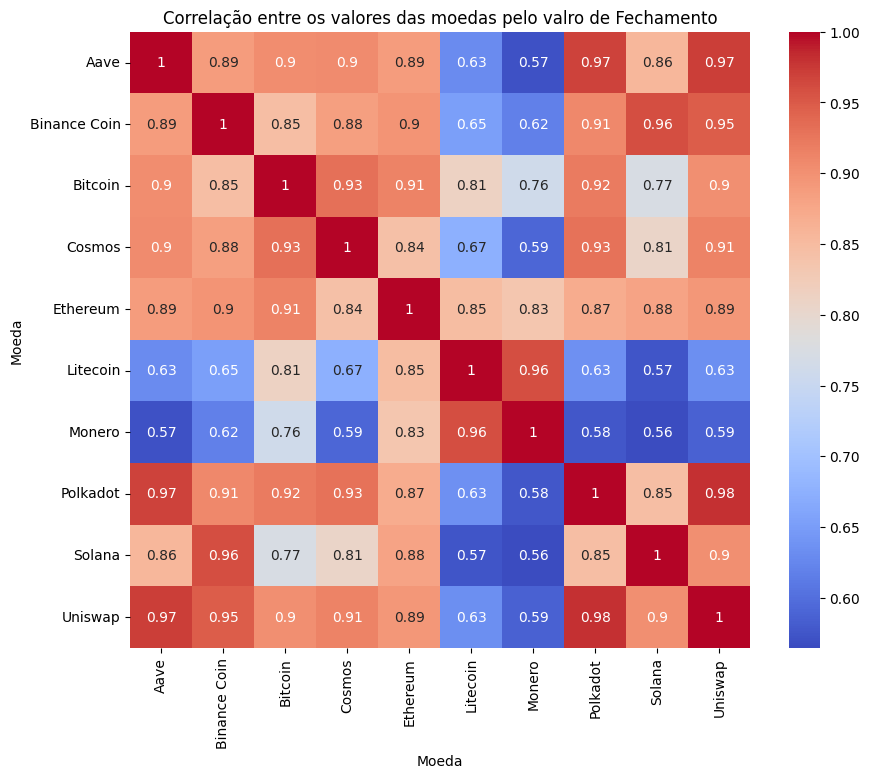

In [ ]:
# Pergunta 7 - Existe correlação entre os valores para todas as criptomoedas?

plt.figure(figsize=(10, 8))
sns.heatmap(criptoanlys.T.corr(), annot=True, cmap="coolwarm")
plt.title('Correlação entre os valores das moedas pelo valro de Fechamento')